# 0. Imports

In [1]:
import sys
sys.path.append("../src/")

import random
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Dataset Read In

In [2]:
df = pd.read_csv("../data/dataset_generated_by_extrucal.csv")
df

,extruder_size,metering_depth,polymer_density,rpm,screw_pitch,flight_width,number_flight,throughput
0,130,7.8,1200,40,78.0,13.0,2,179.805163
1,120,10.8,1300,10,192.0,7.2,2,207.355477
2,170,3.4,1300,90,170.0,23.8,1,795.786618
3,20,1.6,1200,20,16.0,3.2,1,0.799148
4,220,4.4,900,10,352.0,44.0,1,185.655130
...,...,...,...,...,...,...,...,...
1505275,220,15.4,800,60,396.0,17.6,1,3927.828576
1505276,90,3.6,900,20,72.0,9.0,1,32.367363
1505277,210,8.4,800,0,252.0,25.2,2,0.000000
1505278,160,6.4,1400,50,224.0,28.8,1,1056.190994


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505280 entries, 0 to 1505279
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   extruder_size    1505280 non-null  int64  
 1   metering_depth   1505280 non-null  float64
 2   polymer_density  1505280 non-null  int64  
 3   rpm              1505280 non-null  int64  
 4   screw_pitch      1505280 non-null  float64
 5   flight_width     1505280 non-null  float64
 6   number_flight    1505280 non-null  int64  
 7   throughput       1505280 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 91.9 MB


In [4]:
df.nunique()

extruder_size           24
metering_depth         114
polymer_density          7
rpm                     10
screw_pitch            102
flight_width           116
number_flight            2
throughput         1354753
dtype: int64

# 2. Data Distribution Check

## 2.1. Features

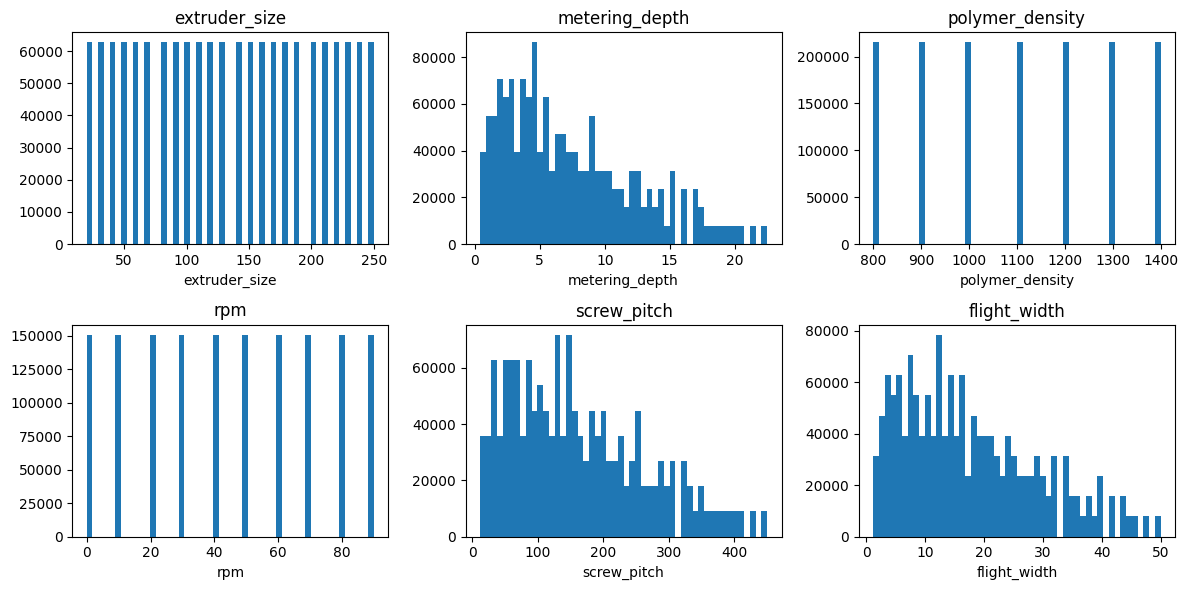

In [5]:
fig, axs = plt.subplots(figsize=(12, 6), nrows=2, ncols=3)
r = 0
c = 0
for feature in df.columns[:6]:
    axs[r, c].hist(df[feature], bins=50)
    axs[r, c].set_title(f"{feature}")
    axs[r, c].set_xlabel(f"{feature}")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
plt.tight_layout()
plt.show();

### After Log Transformation for `metering_depth`, `screw_pitch`, and `flight_width`

In [6]:
log_features = ["metering_depth", "screw_pitch", "flight_width"]

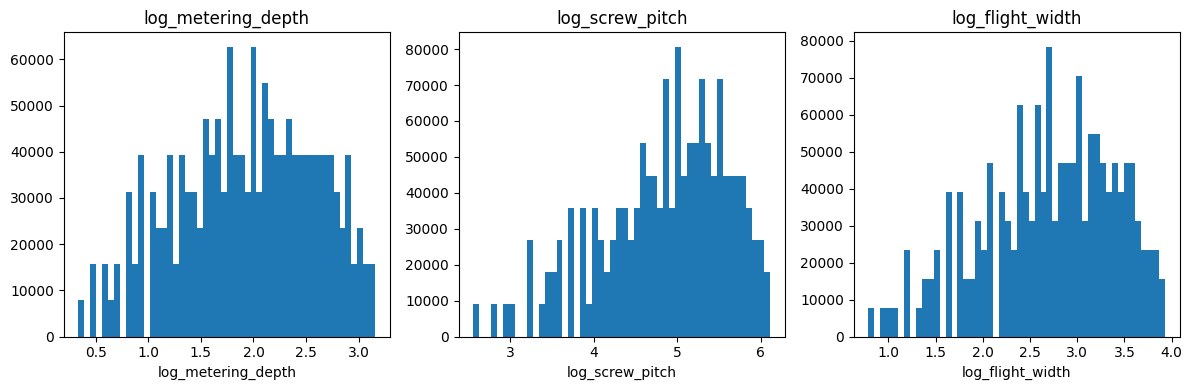

In [7]:
fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)
for i, feature in enumerate(log_features):
    axs[i].hist(np.log1p(df[feature]), bins=50)
    axs[i].set_title(f"log_{feature}")
    axs[i].set_xlabel(f"log_{feature}")
plt.tight_layout()
plt.show();

## 2.2. Target

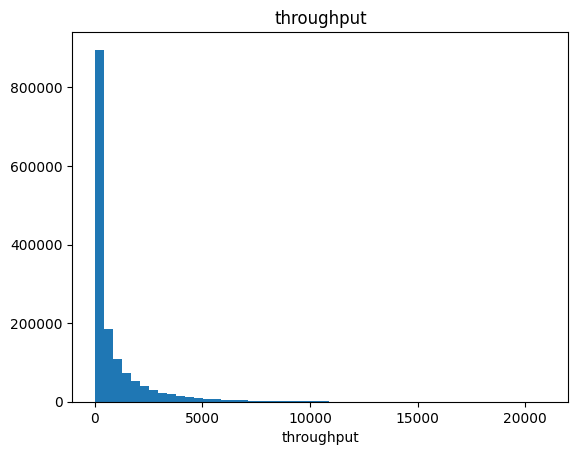

In [8]:
plt.figure()
plt.hist(df["throughput"], bins=50)
plt.title("throughput")
plt.xlabel("throughput")
plt.show();

### After Log Transformation for `throughput`

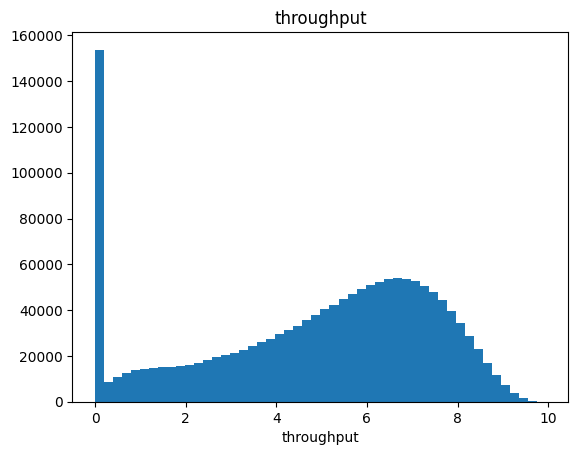

In [9]:
plt.figure()
plt.hist(np.log1p(df["throughput"]), bins=50)
plt.title("throughput")
plt.xlabel("throughput")
plt.show();

# 3. Conclusion

Log-transformation will be applied to `metering_depth`, `screw_pitch`, `flight_width`, and `throughput`